<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-1" data-toc-modified-id="Problem-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem 1</a></span><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Optimization" data-toc-modified-id="Optimization-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Optimization</a></span><ul class="toc-item"><li><span><a href="#Simple-SGD-optimization" data-toc-modified-id="Simple-SGD-optimization-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Simple SGD optimization</a></span></li><li><span><a href="#SGD-with-momentum" data-toc-modified-id="SGD-with-momentum-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>SGD with momentum</a></span></li><li><span><a href="#Target-functions" data-toc-modified-id="Target-functions-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Target functions</a></span></li><li><span><a href="#Plot-cost" data-toc-modified-id="Plot-cost-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Plot cost</a></span></li><li><span><a href="#Parameters" data-toc-modified-id="Parameters-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Rosenbrock-function" data-toc-modified-id="Rosenbrock-function-1.2.6"><span class="toc-item-num">1.2.6&nbsp;&nbsp;</span>Rosenbrock function</a></span></li><li><span><a href="#Powel-Function" data-toc-modified-id="Powel-Function-1.2.7"><span class="toc-item-num">1.2.7&nbsp;&nbsp;</span>Powel Function</a></span></li><li><span><a href="#Question" data-toc-modified-id="Question-1.2.8"><span class="toc-item-num">1.2.8&nbsp;&nbsp;</span>Question</a></span></li></ul></li><li><span><a href="#Regularization" data-toc-modified-id="Regularization-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Regularization</a></span><ul class="toc-item"><li><span><a href="#Parameters" data-toc-modified-id="Parameters-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Parameters</a></span></li><li><span><a href="#Loading-dataset" data-toc-modified-id="Loading-dataset-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Loading dataset</a></span></li><li><span><a href="#Objective-function" data-toc-modified-id="Objective-function-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Objective function</a></span></li><li><span><a href="#Regularization-factor-=-0" data-toc-modified-id="Regularization-factor-=-0-1.3.4"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>Regularization factor = 0</a></span></li><li><span><a href="#Regularization-factor-=-0.001" data-toc-modified-id="Regularization-factor-=-0.001-1.3.5"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Regularization factor = 0.001</a></span></li><li><span><a href="#Regularization-factor-=-0.01" data-toc-modified-id="Regularization-factor-=-0.01-1.3.6"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Regularization factor = 0.01</a></span></li><li><span><a href="#Question" data-toc-modified-id="Question-1.3.7"><span class="toc-item-num">1.3.7&nbsp;&nbsp;</span>Question</a></span></li></ul></li></ul></li></ul></div>

# Problem 1
Please fill todo parts of this code. 
You can change any part of the code that you think it is needed but we do not suggest that. 

After you filled the todo parts please run the whole network one time and then upload your results. 

## Import 
Import your required libraries in this cell. 

**Note**: You cannot use torch.optim library in this problem. 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from pandas import read_csv

## Optimization

### Simple SGD optimization

In [ ]:
def vanilla_sgd_optimization(func, input_dim, num_iteration, step_size):
    '''
    This function finds the local minimum of a function with vanilla sgd.
    
    Inputs:
    func: target function
    input_dim: dimension of the function input
    num_iteration: number of iterations that sgd should be done. 
    step_size: size of the steps of the sgd
    
    Outputs:
    x: the local minimum point of the function
    func_value_list: list of values of the function in the sgd steps
    '''
    
    x = torch.randn(input_dim, requires_grad=True)
    func_value_list = []
    for _ in range(num_iteration):
        y = func(x)
        func_value_list.append(y.data)
        y.backward()
        x.data -= step_size * x.grad
        x.grad.zero_()
        
    return x, func_value_list

### SGD with momentum

In [ ]:
def momentum_sgd_optimization(func, input_dim, num_iteration, step_size, v=0, alpha=0.9):
    '''
    This function finds the local minimum of a function with momentum sgd.
    
    Inputs:
    func: target function
    input_dim: dimension of the function input
    num_iteration: number of iterations that sgd should be done. 
    step_size: size of the steps of the sgd
    v: initial velocity 
    alpha: momentum parameter
    
    Outputs:
    x: the local minimum point of the function
    func_value_list: list of values of the function in the sgd steps
    '''
    
    x = torch.randn(input_dim, requires_grad=True)
    func_value_list = []
    for _ in range(num_iteration):
        y = func(x)
        # print('x = {} \n'.format(x))
        # print('y = {} \n'.format(y))
        func_value_list.append(y.data)
        y.backward()
        v = alpha * v - step_size * x.grad.data
        # print('grad = {} \n'.format(x.grad))
        x.data += v
        x.grad.zero_()

    return x, func_value_list

### Target functions 
Implement these two functions:
* Rosenbrock function: 
\begin{equation}
f(x) = 100(x_2 - x_1^2)^2 + (1 - x_2)^2
\end{equation}

* Powel function: 
\begin{equation}
f(x) = (x_1 - 10x_2)^2 + 5(x_3 - x_4)^2 + (x_2 - 2x_3)^4 + 10(x_1 - x_4)^4
\end{equation}

In [ ]:
def rosen_brock_function(x):
    f = 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[1]) ** 2
    return f

def powel_function(x):
    f = (x[0] - 10 * x[1]) ** 2 + 5 * (x[2] - x[3]) ** 2 + (x[1] - 2 * x[2]) ** 4 + 10 * (x[0] - x[3]) ** 4
    return f

### Plot cost 

In [ ]:
def plot_function_value(vanilla_sgd_function_values, momentum_sgd_function_values):
    plt.figure(figsize=(10, 8))
    plt.plot(np.log(momentum_sgd_function_values), label='momentom')
    plt.plot(np.log(vanilla_sgd_function_values), label='vanilla')
    plt.legend(fontsize=14)
    plt.xlabel('Iteration', fontsize=14)
    plt.ylabel('Function value', fontsize=14)
    plt.show()

### Parameters 
**Note**: Use these parameters for this section and do not change them.

In [ ]:
NUM_ITERATIONS = 10000
STEP_SIZE = 1e-3
ROSEN_BROCK_INPUT_DIM = 2
POWEL_INPUT_DIM = 4

### Rosenbrock function

min of rosenbrock function with vanilla sgd is 4.3307935015945986e-10
min of rosenbrock function with momentum sgd is 6.430411758628907e-13


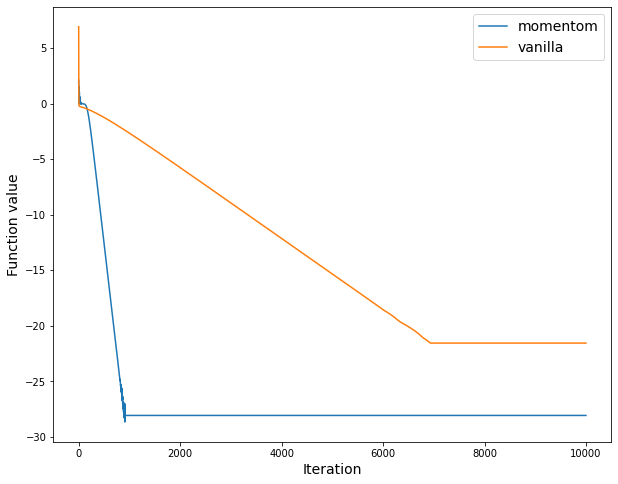

In [ ]:
# todo: fill function inputs
vanilla_sgd_min_x, vanilla_sgd_function_values = vanilla_sgd_optimization(rosen_brock_function, ROSEN_BROCK_INPUT_DIM, NUM_ITERATIONS, STEP_SIZE)

momentum_sgd_min_x, momentom_sgd_function_values = momentum_sgd_optimization(rosen_brock_function, ROSEN_BROCK_INPUT_DIM, NUM_ITERATIONS, STEP_SIZE)

print('min of rosenbrock function with vanilla sgd is {}'.format(rosen_brock_function(vanilla_sgd_min_x)))
print('min of rosenbrock function with momentum sgd is {}'.format(rosen_brock_function(momentum_sgd_min_x)))
plot_function_value(vanilla_sgd_function_values, momentom_sgd_function_values)

### Powel Function

min of powel function with vanilla sgd is 0.00015247306146193296
min of powel function with momentum sgd is 2.3334077923209406e-06


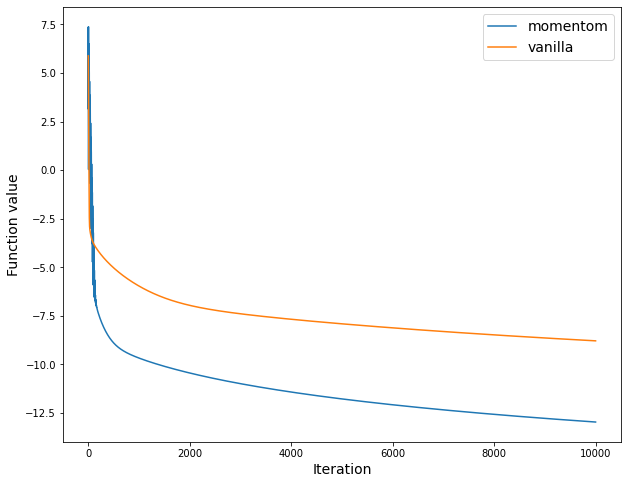

In [ ]:
# todo: fill function inputs
vanilla_sgd_min_x, vanilla_sgd_function_values = vanilla_sgd_optimization(powel_function, POWEL_INPUT_DIM, NUM_ITERATIONS, STEP_SIZE)

momentum_sgd_min_x, momentom_sgd_function_values = momentum_sgd_optimization(powel_function, POWEL_INPUT_DIM, NUM_ITERATIONS, STEP_SIZE)

print('min of powel function with vanilla sgd is {}'.format(powel_function(vanilla_sgd_min_x)))
print('min of powel function with momentum sgd is {}'.format(powel_function(momentum_sgd_min_x)))
plot_function_value(vanilla_sgd_function_values, momentom_sgd_function_values)

### Question
According to the above plots, what is the effect of momentum? 

*Answer*: 
It accelerate the convergence process.

## Regularization

### Parameters
**Note**: Use this parameters for this section and do not change them.

In [ ]:
feature_dim = 2
train_ratio = 0.8
NUM_ITERATIONS = 10000
# NUM_ITERATIONS = 10
STEP_SIZE = 1

### Loading dataset
* Load the salary dataset. 
* Consider YearsExperience column as X and add one column of ones to it for bias. 
* Consider Salary column as Y.
* Split X and Y to train and test. 

In [ ]:
from sklearn.model_selection import train_test_split
df = read_csv('Salary_Data.csv')
X = np.concatenate((df[['YearsExperience']], np.ones((df.shape[0], 1))), axis=1)
y = np.array(df['Salary'])
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=(1 - train_ratio), shuffle=True)
train_x = torch.tensor(train_x)
train_y = torch.tensor(train_y)
test_x = torch.tensor(test_x)
test_y = torch.tensor(test_y)

### Objective function

In [ ]:
def linear_equation_error(x, y, w, reg_factor=0):
    '''
    This function should calculate the norm 2 of error of the linear equation.
    Input: 
    x: feature vector (n_sample, feature_dim)
    y: label vector (n_sample, 1)
    w: weights (feature_dim, 1)
    reg_factor: regularization factor. Note that for evaluation this parameter should be set to 0. 
    
    Output: 
    loss: (norm2(y - x*w) + reg_factor*norm2(w))/n_sample
    '''
    w = w[:, None].double()
    error = (torch.norm((y - torch.matmul(x, w))) + reg_factor * torch.norm(w)) / x.shape[0]
    return error

### Regularization factor = 0

In [ ]:
reg_factor = 0.0
naive_linear_equation_error_handler = lambda w: linear_equation_error(train_x, train_y, w, reg_factor)

# todo: fill function inputs
naive_weights, naive_train_error = momentum_sgd_optimization(naive_linear_equation_error_handler, feature_dim, NUM_ITERATIONS, STEP_SIZE, 0, 0.9)
print('train error without regularization: {}'.format(linear_equation_error(train_x, train_y, naive_weights, reg_factor)))
print('test error without regularization: {}'.format(linear_equation_error(test_x, test_y, naive_weights, reg_factor)))

train error without regularization: 33372.81823562635
test error without regularization: 32890.49345818068


### Regularization factor = 0.001

In [ ]:
reg_factor = 0.001

regularized_linear_equation_error_handler = lambda w: linear_equation_error(train_x, 
                                                                            train_y,
                                                                            w,
                                                                            reg_factor)
# todo: fill function inputs
regularized_weights, regularized_train_error = momentum_sgd_optimization(regularized_linear_equation_error_handler, feature_dim, NUM_ITERATIONS, STEP_SIZE, 0, 0.9)

print('train error with regularization: {}'.format(linear_equation_error(train_x, train_y, regularized_weights, reg_factor)))
print('test error with regularization: {}'.format(linear_equation_error(test_x, test_y, regularized_weights, reg_factor)))

train error with regularization: 33374.24429922869
test error with regularization: 32896.2385274014


### Regularization factor = 0.01

In [ ]:
reg_factor = 0.01

regularized_linear_equation_error_handler = lambda w: linear_equation_error(train_x, 
                                                                            train_y,
                                                                            w,
                                                                            reg_factor)
# todo: fill function inputs
regularized_weights, regularized_train_error = momentum_sgd_optimization(regularized_linear_equation_error_handler, feature_dim, NUM_ITERATIONS, STEP_SIZE, 0, 0.9)

print('train error with regularization: {}'.format(linear_equation_error(train_x, train_y, regularized_weights, reg_factor)))
print('test error with regularization: {}'.format(linear_equation_error(test_x, test_y, regularized_weights, reg_factor)))

train error with regularization: 33394.186244197954
test error with regularization: 32953.814634103204


### Question 
* What is the effect of regularization?
* What is the effect of size of regularization term?

Answer: It prevents overfitting by reducing the norm of w. As we increase the regularization term the optimizer tends to reduce the norm of w more and if we set the size a great number, it may result in underfitting.